In [14]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
#loading dataset to pandas dataframe
website = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\website_classification.csv")

In [17]:
#print the first 5 rows of data
website.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [18]:
website.tail()

,Unnamed: 0,website_url,cleaned_website_text,Category
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult
1407,1407,http://www.world-sex-news.com/,world sex news daily sex news adult news eroti...,Adult


In [19]:
website.shape

(1408, 4)

In [20]:
#checking for missing values
website.isnull().sum()

Unnamed: 0              0
website_url             0
cleaned_website_text    0
Category                0
dtype: int64

In [21]:
website['Category'].value_counts()

Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Photography                         93
Computers and Technology            93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Adult                               16
Forums                              16
Name: Category, dtype: int64

## Data visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Travel'),
  Text(1, 0, 'Social Networking and Messaging'),
  Text(2, 0, 'News'),
  Text(3, 0, 'Streaming Services'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Photography'),
  Text(6, 0, 'Law and Government'),
  Text(7, 0, 'Health and Fitness'),
  Text(8, 0, 'Games'),
  Text(9, 0, 'E-Commerce'),
  Text(10, 0, 'Forums'),
  Text(11, 0, 'Food'),
  Text(12, 0, 'Education'),
  Text(13, 0, 'Computers and Technology'),
  Text(14, 0, 'Business/Corporate'),
  Text(15, 0, 'Adult')])

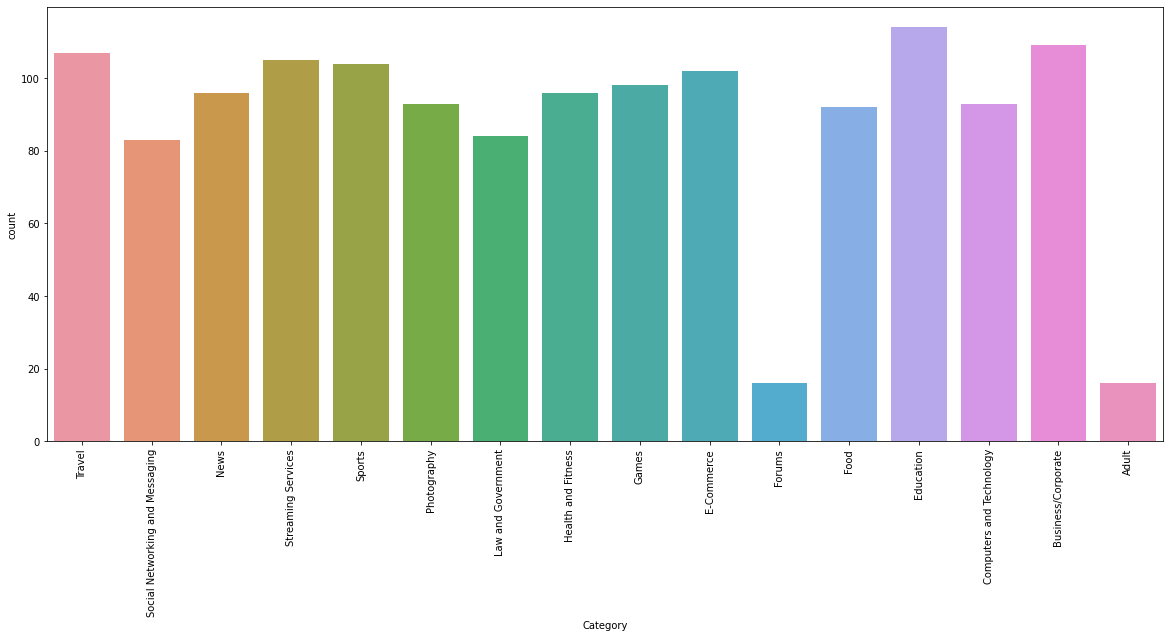

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x='Category',data=website)
plt.xticks(rotation=90)

## Create a Data

In [23]:
X = website['cleaned_website_text']
y = website['Category']

## Label Encoder

In [24]:
le = LabelEncoder()

In [25]:
le.fit(y)

LabelEncoder()

In [26]:
le.classes_

array(['Adult', 'Business/Corporate', 'Computers and Technology',
       'E-Commerce', 'Education', 'Food', 'Forums', 'Games',
       'Health and Fitness', 'Law and Government', 'News', 'Photography',
       'Social Networking and Messaging', 'Sports', 'Streaming Services',
       'Travel'], dtype=object)

In [27]:
y = le.transform(y)

In [28]:
print(y)

[15 15 15 ...  0  0  0]


## Split data into train test & Split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## Create a pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

## Prediction

In [39]:
prediction =text_clf.predict(X_test)

In [40]:
print(confusion_matrix(y_test,prediction))

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 35  1  3  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1 22  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0 32  0  0  0  1  0  0  0  0  0  0  2  0]
 [ 0  1  0  0 43  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  2  0  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0 30  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0 28  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 35  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1 31  0  0  0  0]
 [ 0  0  1  0  1  1  0  0  0  0  0  1 23  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 25]]


In [41]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      0.88      0.88        40
           2       0.73      0.88      0.80        25
           3       0.89      0.89      0.89        36
           4       0.96      0.96      0.96        45
           5       0.94      0.97      0.95        30
           6       1.00      0.25      0.40         4
           7       0.94      0.91      0.92        33
           8       0.96      1.00      0.98        23
           9       1.00      0.97      0.98        29
          10       0.97      0.97      0.97        36
          11       0.97      0.94      0.95        33
          12       1.00      0.79      0.88        29
          13       0.95      0.97      0.96        39
          14       0.89      1.00      0.94        31
          15       0.93      0.96      0.94        26

    accuracy                           0.93       465
   macro avg       0.94   

In [42]:
print(accuracy_score(y_test,prediction).round(2))

0.93
